In [3]:
import sys
sys.path.append('../')
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Изменим стандартный размер графиков matplotlib
WIDTH_SIZE = 15
HEIGHT_SIZE = 10
plt.rcParams["figure.figsize"] = [WIDTH_SIZE, HEIGHT_SIZE]

In [4]:
rgb_img = cv2.imread('./images/img1.jpg') 
print(rgb_img)

[[[ 17   5  93]
  [ 35  26 106]
  [ 56  50 115]
  ...
  [200 216 232]
  [219 242 244]
  [222 250 244]]

 [[ 11   0  87]
  [ 38  29 109]
  [ 49  43 108]
  ...
  [202 216 235]
  [222 241 248]
  [225 249 249]]

 [[ 50  38 126]
  [ 76  67 147]
  [102  96 161]
  ...
  [132 139 166]
  [179 192 208]
  [223 239 251]]

 ...

 [[203 215 255]
  [131 147 189]
  [ 60  85 129]
  ...
  [138 133 164]
  [170 160 190]
  [174 162 192]]

 [[169 182 220]
  [ 74  91 130]
  [  0  19  61]
  ...
  [153 146 191]
  [179 168 214]
  [192 176 223]]

 [[171 185 221]
  [ 73  91 128]
  [  0  19  61]
  ...
  [149 141 194]
  [171 157 211]
  [195 179 233]]]


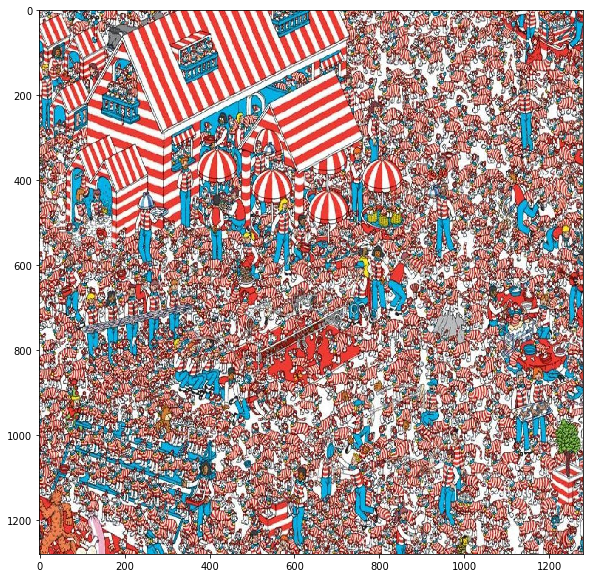

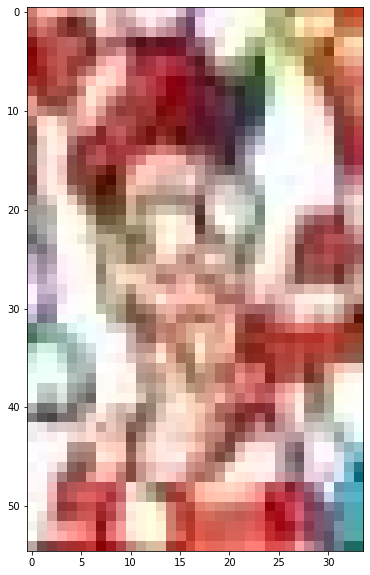

In [6]:
# Загружаем изображение
rgb_img = cv2.imread('./images/img1.jpg') 
plt.figure()
plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
# Преобразуем изображение в оттенки серого 
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

# Загружаем шаблон  
template = cv2.imread('./images/img2.jpg')
plt.figure()
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))

# Преобразуем в оттенки серого
gray_templ = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)  

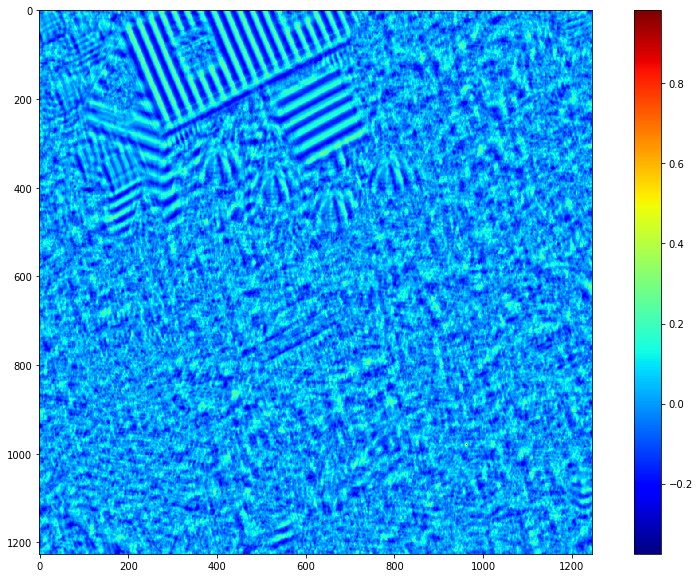

In [7]:
# Считаем размеры шаблона
w, h = template.shape[:-1] 
 
# Вызываем функцию cv2.matchTemplate для вычисления метрики схожести
# в качестве параметров передаем изображение, шаблон и тип вычисляемой метрики
res = cv2.matchTemplate(gray_img,gray_templ,cv2.TM_CCOEFF_NORMED)  

# Возможные варианты метрик:
#    cv2.TM_SQDIFF — сумма квадратов разниц значений пикселей
#    cv2.TM_SQDIFF_NORMED — сумма квадрат разниц цветов, отнормированная в диапазон 0..1.
#    cv2.TM_CCORR — сумма поэлементных произведений шаблона и сегмента картинки
#    cv2.TM_CCORR_NORMED — сумма поэлементных произведений, отнормированное в диапазон -1..1.
#    cv2.TM_CCOEFF — кросс-коррелация изображений без среднего
#    cv2.TM_CCOEFF_NORMED — кросс-корреляция между изображениями без среднего, отнормированная в -1..1 (корреляция Пирсона)
plt.figure()
plt.imshow(res, cmap='jet')
plt.colorbar()

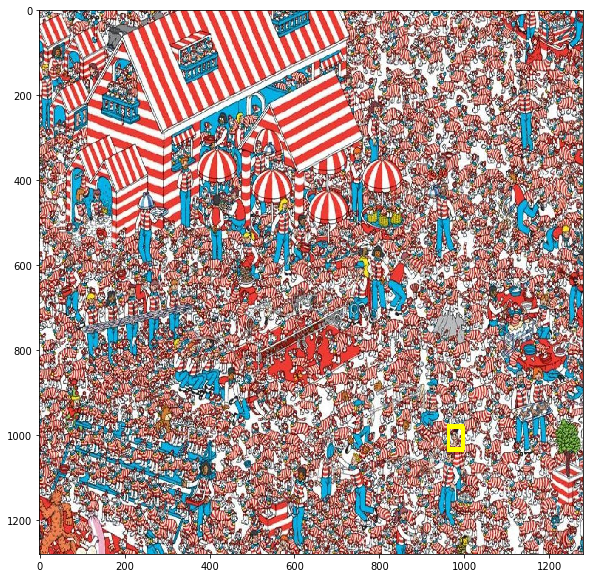

In [9]:
threshold = 0.8
loc = np.where(res >= threshold) 
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = rgb_img.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(plot_img, pt,(pt[0] + h, pt[1] + w),(0,255,255), 8)  

# Отображаем результат на графике
plt.figure()
plt.imshow(cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB))